In [1]:
import yfinance as yf
import pandas as pd

# download data from yahoo finance for the following tickers CAD=X, CL=F, ^GSPC, ^IXIC, GC=F
tickers = ['CAD=X', 'CL=F', '^GSPC', '^IXIC', 'GC=F']
data = yf.download(tickers, period='max', group_by='ticker')

data[tickers[0]]['Close']

df = pd.DataFrame()

for ticker in tickers:
    df[ticker] = data[ticker]['Close']

# drop rows with missing values
df = df.dropna()
# rename columns where CAD=X is USDCAD, CL=F is OIL, ^GSPC is S&P, ^IXIC is NASDAQ, GC=F is GOLD
df.columns = ['USDCAD', 'OIL', 'S&P', 'NASDAQ', 'GOLD']
# cretae a correlation matrix
corr_matrix = df.corr()


In [36]:
corr_matrix

,USDCAD,OIL,S&P,NASDAQ,GOLD
USDCAD,1.000000,-0.700733,0.575790,0.560697,0.086941
OIL,-0.700733,1.000000,-0.020815,-0.037210,0.301952
S&P,0.575790,-0.020815,1.000000,0.991732,0.708218
NASDAQ,0.560697,-0.037210,0.991732,1.000000,0.725674
GOLD,0.086941,0.301952,0.708218,0.725674,1.000000


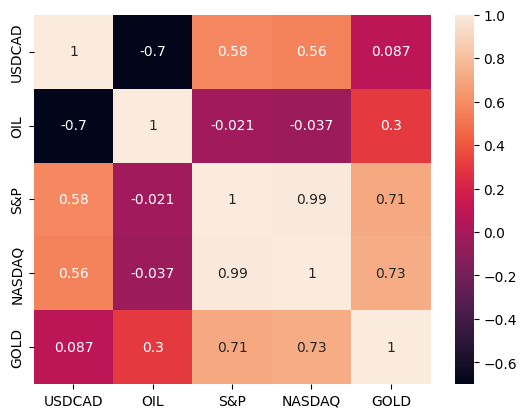

In [35]:
# visualize the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True)
plt.show()
